In [69]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker

In [70]:
# Colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'
WHITE1 = '#FFFFFF'

In [71]:
# Setting the stage
mpl.rcParams['figure.figsize'] = 6.5, 4         # figure size
mpl.rcParams['figure.dpi'] = 100                # dots per inch, magnifying effect
# mpl.rcParams['axes.spines.top'] = False         # Remove top spine
mpl.rcParams['axes.spines.bottom'] = False      # Remove bottom spine
mpl.rcParams['axes.spines.right'] = False       # Remove right spine
# mpl.rcParams['axes.spines.left'] = False        # Remove left spine
mpl.rcParams['axes.edgecolor'] = GRAY4          # Gray edge collors
mpl.rcParams['xtick.color'] = GRAY4             # Gray xticks
mpl.rcParams['ytick.color'] = GRAY4             # Gray yticks
mpl.rcParams['ytick.left'] = True               # Remove y-axis ticks
mpl.rcParams['text.color'] = GRAY4              # Text
mpl.rcParams['font.family'] = 'Arial'           # Font

In [72]:
# Data
data = pd.DataFrame({
    'satisfaction': [0.73, 0.76, 0.74, 0.78, 0.84, 0.78, 0.75],
    'issues': [487, 1253, 958, 1009, 720, 942, 800]
}, index=['Model A', 'Model B', 'Model C', 'Model D', 'Model E', 'Model F', 'Model G'])

AVG_PRIOR_SAT = 0.72
AVG_PRIOR_ISS = 895

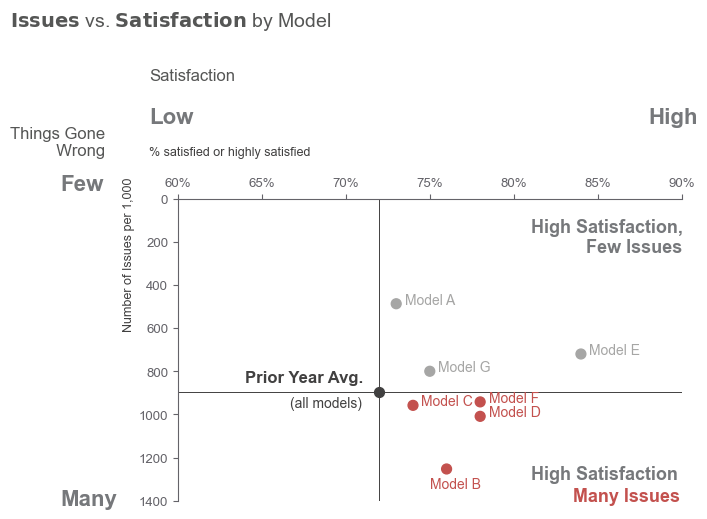

In [106]:
fig, ax = plt.subplots()

# Scatter
colors = [GRAY8 if vals[0] > AVG_PRIOR_SAT and vals[1] < AVG_PRIOR_ISS else RED1 for vals in zip(data.satisfaction, data.issues)]
scatter1 = ax.scatter(data.satisfaction, data.issues, color=colors, s=50)

ax.xaxis.set_ticks_position('top')      # Moving x-axis labels to the top

# Axis limits
ax.set_ylim(1400, 0)
ax.set_xlim(0.6, 0.9)

# Prior year avg.
scatter2 = ax.scatter(AVG_PRIOR_SAT, AVG_PRIOR_ISS, color=GRAY2, s=50)
ax.plot([0, 1], [AVG_PRIOR_ISS, AVG_PRIOR_ISS], color=GRAY2, lw=0.7)
ax.plot([AVG_PRIOR_SAT, AVG_PRIOR_SAT], [0, 2000], color=GRAY2, lw=0.7)
# Formatting x-axis
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))     # Percent formatter

# Axis ticks
ax.tick_params(axis='both', which='major', labelsize=9.5)

# Annotations
for ix, point in enumerate(scatter1.get_offsets().data):
    if ix == 1:
        ax.text(point[0]-0.01, point[1]+90, data.index[ix], fontsize=10, color=colors[ix]) 
    else:
        ax.text(point[0]+0.005, point[1], data.index[ix], fontsize=10, color=colors[ix])

ax.text(AVG_PRIOR_SAT-0.08, AVG_PRIOR_ISS-45, 'Prior Year Avg.', fontsize=12, fontweight='bold', color=GRAY2)
ax.text(AVG_PRIOR_SAT-0.053, AVG_PRIOR_ISS+70, '(all models)', fontsize=10, color=GRAY2)

ax.text(0.81, 250, 'High Satisfaction,\n           Few Issues', fontsize=13, fontweight='bold', color=GRAY5)
ax.text(0.81, 1300, 'High Satisfaction', fontsize=13, fontweight='bold', color=GRAY5)
ax.text(0.835, 1400, 'Many Issues', fontsize=13, fontweight='bold', color=RED1)

ax.text(0.583, -200, '% satisfied or highly satisfied', fontsize=9, color=GRAY2)
ax.text(0.567, 600, 'Number of Issues per 1,000', fontsize=9, color=GRAY2,rotation='vertical')

ax.text(0.583, -350, 'Low', fontsize=16, fontweight='bold', color=GRAY5)
ax.text(0.88, -350, 'High', fontsize=16, fontweight='bold', color=GRAY5)
ax.text(0.53, -40, 'Few', fontsize=16, fontweight='bold', color=GRAY5)
ax.text(0.53, 1420, 'Many', fontsize=16, fontweight='bold', color=GRAY5)

ax.text(0.583, -550, 'Satisfaction', fontsize=12, color=GRAY3)
ax.text(0.5, -200, 'Things Gone\n          Wrong', fontsize=12, color=GRAY3)

txt1 = r"$\bf{Issues}$ vs. $\bf{Satisfaction}$ by Model"
ax.text(0.5, -800, txt1, fontsize=14, color=GRAY3)

plt.savefig('plots/scatter_plot_2.png', bbox_inches="tight")
plt.show()